# <font color='#FF4500'>Regression with a Crab Age Dataset</font><a class='anchor' id='top'></a>


<center>
<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZGZjNDdhNDkwMDA1ZDZhMTQzZjg1NTg3ZjMwOGJhOGQ2ZThhZjRhNSZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/l4FBcHVO3FVWAp87S/giphy.gif" width=500>
</center>


## <font color='#FF45003'>Task: Use Regression with a Crab Age Dataset to determine the age of Crabs <font><a class='anchor' id='top'></a>

### <font color='#FF4500'> `Understanding the task`: The task described in the context is "Crab Age Prediction." The goal of this task is to estimate the age of a crab based on its physical attributes. The dataset provided can be used for classical regression analysis, feature engineering, and understanding the impact of feature engineering in the field of Data Science.

<font><a class='anchor' id='top'></a>

<div class="alert alert-block alert-info"> 

📌 The ultimate objective is to build a regression model that can accurately predict the age of a crab based on its physical characteristics. This prediction can be valuable for commercial crab farmers as it helps them determine the optimal timing for harvesting the crabs. By harvesting the crabs at the right age, farmers can minimize costs and maximize profits. </div>

# <font color='#FF4500'>Table of contents<font><a class='anchor' id='top'></a>

- [Regression with a Crab Age Dataset](#1)
    - [Task & Understanding the task:](#2)
- [Data Understanding I](#3)
    - [Data Understanding II](#4)
- [Importing Libraries & Data](#6)
    - [Load Data Modelling Libraries](#7)
- [Making our datasets available in our coding environment](#8)
    - [Reading in our csv files and putting them into a dataframe object](#9)
- [Data Explorer Class Implementation](#10)

# <font color='#FF4500'>Data Understanding I</font><a class='anchor' id='top'></a>

- `Sex`: The crab's gender, with "F" indicating female, "M" indicating male, and "I" indicating immature.
- `Length`: The measurement of the crab's length.
- `Diameter`: The measurement of the crab's diameter.
- `Height`: The measurement of the crab's height.
- `Weight`: The total weight of the crab.
- `Shucked Weight`: The weight of the crab's meat without the shell.
- `Viscera Weight`: The weight of the crab's internal organs.
- `Shell Weight`: The weight of the crab's shell.
- `Age`: The estimated age of the crab.


# <font color='#FF4500'>Data Understanding II</font><a class='anchor' id='top'></a>

There are two datasets, The original dataset and the generated dataset, we will be using both to compare and contrast features etc.

`Files`:

- `train.csv` - the training dataset; Age is the target

- `test.csv` - the test dataset; your objective is to predict the probability of Age (the ground truth is int but you can predict int or float)

- `sample_submission.csv` - a sample submission file in the correct format

`Files from the original dataset`:

- `CrabAgePrediction.csv`

# <font color='#FF4500'>Importing Libraries & Data</font><a class='anchor' id='top'></a>


In [2]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
from IPython.display import HTML, display
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.8.3 (v3.8.3:6f8c8320e9, May 13 2020, 16:29:34) 
[Clang 6.0 (clang-600.0.57)]
pandas version: 2.0.2
matplotlib version: 3.7.1
NumPy version: 1.24.3
SciPy version: 1.10.1
IPython version: 8.12.2
scikit-learn version: 1.2.2
-------------------------


In [3]:

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = 12,8
print("Seaborn version: {}". format(sns.__version__)) 

Seaborn version: 0.12.2


# <font color='#FF4500'>Making our datasets available in our coding environment<font><a class='anchor' id='top'></a>

In [4]:
#PATH = "/kaggle/input/playground-series-s3e16"
TRAIN_FILENAME = "/Users/richeyjay/Desktop/CrabAgeRegression/env/Data/train.csv"
TEST_FILENAME = "/Users/richeyjay/Desktop/CrabAgeRegression/env/Data/test.csv"


ORIGINAL_FILENAME = "/Users/richeyjay/Desktop/CrabAgeRegression/env/Data/CrabAgePrediction.csv"

# <font color='#FF4500'>Reading in our csv files and putting them into a dataframe object<font><a class='anchor' id='top'></a>


In [5]:
original_data = pd.read_csv(ORIGINAL_FILENAME)
print(original_data.shape)
print('-'*50)

train_data = pd.read_csv(TRAIN_FILENAME)
print(train_data.shape)
print('-'*50)

test_data = pd.read_csv(TEST_FILENAME)
print(test_data.shape)
print('-'*50)

(3893, 9)
--------------------------------------------------
(74051, 10)
--------------------------------------------------
(49368, 9)
--------------------------------------------------


# <font color='#FF4500'>Data Exploration Class Implementation<font><a class='anchor' id='top'></a>

Here's a brief summary for each function in the `DataExplorer` class:

- `__init__(self, data)`: Initializes the class instance with the provided data.
- `print_info(self)`: Prints information about the data, including the data type and column details.
- `check_null_values(self)`: Checks if there are any null values in the data and displays columns with null values.
- `check_duplicate_rows(self)`: Checks for duplicate rows in the data and reports the count of duplicate rows found.
- `check_data_shape(self)`: Prints the number of rows and columns in the data.
- `describe_numeric_features(self)`: Provides descriptive statistics for numeric features in the data.
- `describe_categorical_features(self)`: Provides descriptive statistics for categorical features in the data.
- `check_duplicates(self)`: Prints the number of duplicate rows in the data.
- `check_columns(self)`: Prints the column names of the data.
- `check_data_types(self)`: Prints the data types of each column.
- `drop_duplicates(self)`: Drops duplicate rows from the data.
- `drop_column(self, column)`: Drops the specified column from the data.
- `fill_null(self, column, value)`: Fills null values in the specified column with the provided value.
- `clean_data(self)`: Performs data cleaning operations including checking null values, dropping duplicates, and dropping unnecessary columns.
- `get_min(self)`: Prints the minimum value for each numeric column.
- `get_max(self)`: Prints the maximum value for each numeric column.
- `get_range(self)`: Prints the range (minimum and maximum values) for each numeric column.

Each function performs specific operations related to data exploration, data cleaning, and basic statistics for the provided data.

In [6]:
class DataExplorer:
    def __init__(self, data):
        self.data = data

    def print_info(self):
        try:
            print(self.data.info())
        except AttributeError:
            print('Error: Invalid data type provided. Must be a Pandas DataFrame.')
        print('-'*50)
        
    def check_null_values(self):
        try:
            if self.data.isnull().values.any():
                print("Null values found.")
                null_cols = self.data.columns[self.data.isnull().any()]
                for col in null_cols:
                    print(f"{col} column has {self.data[col].isnull().sum()} null values.")
            else:
                print("No null values found.")
        except AttributeError:
            print('Error: Invalid data type provided. Must be a Pandas DataFrame.')
        print('-'*50)
            
    def check_duplicate_rows(self):
        try:
            if self.data.duplicated().sum() > 0:
                print(f"{self.data.duplicated().sum()} duplicate rows found.")
            else:
                print("No duplicate rows found.")
        except AttributeError:
            print('Error: Invalid data type provided. Must be a Pandas DataFrame.')
        print('-'*50)
            
    def check_data_shape(self):
        try:
            print(f"Number of rows: {self.data.shape[0]}")
            print(f"Number of columns: {self.data.shape[1]}")
        except AttributeError:
            print('Error: Invalid data type provided. Must be a Pandas DataFrame.')
        print('-'*50)
        
    def describe_numeric_features(self):
        try:
            numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns.tolist()
            if not numeric_cols:
                print("No numeric columns found.")
            else:
                print(self.data[numeric_cols].describe())
        except AttributeError:
            print('Error: Invalid data type provided. Must be a Pandas DataFrame.')
        print('-'*50)
        
    def describe_categorical_features(self):
        try:
            categorical_cols = self.data.select_dtypes(include=['object']).columns.tolist()
            if not categorical_cols:
                print("No categorical columns found.")
            else:
                print(self.data[categorical_cols].describe())
        except AttributeError:
            print('Error: Invalid data type provided. Must be a Pandas DataFrame.')
        print('-'*50)

    def check_duplicates(self):
        try:
            print(f"Number of duplicate rows: {self.data.duplicated().sum()}")
        except AttributeError:
            print('Error: Invalid data type provided. Must be a Pandas DataFrame.')
        print('-'*50)
        
    def check_columns(self):
        try:
            print(self.data.columns)
        except AttributeError:
            print('Error: Invalid data type provided. Must be a Pandas DataFrame.')
        print('-'*50)
        
    def check_data_types(self):
        try:
            print(self.data.dtypes)
        except AttributeError:
            print('Error: Invalid data type provided. Must be a Pandas DataFrame.')
        print('-'*50)

    def drop_duplicates(self):
        try:
            self.data.drop_duplicates(inplace=True)
            if self.data.duplicated().sum() == 0:
                print("No duplicates found.")
            else:
                print("Duplicates dropped.")
        except AttributeError:
            print('Error: Invalid data type provided. Must be a Pandas DataFrame.')
        print('-'*50)

    def drop_column(self, column):
        try:
            self.data.drop(column, axis=1, inplace=True)
            print(f'Column {column} dropped')
            print('-'*50)
        except Exception as e:
            print(f"Error: {e}")
    
    def fill_null(self, column, value):
        try:
            self.data[column].fillna(value, inplace=True)
            print(f'Null values in {column} filled with {value}')
            print('-'*50)
        except Exception as e:
            print(f"Error: {e}")
    
    def clean_data(self):
        try:
            self.check_null_values()
            self.drop_duplicates()
            if 'id' in self.data.columns:
                self.drop_column('id')
            print('Data cleaned')
            print('-'*50)
        except Exception as e:
            print(f"Error: {e}")

    def get_min(self):
        numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns.tolist()
        if not numeric_cols:
            print("No numeric columns found.")
        else:
            for col in numeric_cols:
                try:
                    minimum = self.data[col].min()
                    print(f"Minimum value in {col}: {minimum}")
                except TypeError:
                    print(f"Column {col} must contain numeric values.")
                except:
                    print(f"An error occurred while getting the minimum value for column {col}.")
                finally:
                    print('-'*50)

    

    def get_max(self):
        numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns.tolist()
        if not numeric_cols:
            print("No numeric columns found.")
        else:
            for col in numeric_cols:
                try:
                    print(f"Maximum value in {col}: {self.data[col].max()}")
                except TypeError:
                    print(f"Column {col} must contain numeric values.")
                except:
                    print(f"An error occurred while getting the maximum value for column {col}.")
                finally:
                    print('-'*50)

    def get_range(self):
        numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns.tolist()
        if not numeric_cols:
            print("No numeric columns found.")
        else:
            for col in numeric_cols:
                try:
                    minimum = self.data[col].min()
                    maximum = self.data[col].max()
                    print(f"Range for {col}: [{minimum} - {maximum}]")
                except TypeError:
                    print(f"Column {col} must contain numeric values.")
                except:
                    print(f"An error occurred while getting the range for column {col}.")
                finally:
                    print('-'*50)





# <font color='#FF4500'>Observing our Features<font><a class='anchor' id='top'></a>

Here's an explanation of each column in the dataset and the type of data they hold:

1. `id`: This column represents the unique identification number assigned to each crab in the dataset. It is likely an integer or a string type depending on the representation used.

2. `Sex`: This column indicates the gender of the crab. It can take values such as "M" for male, "F" for female, or "I" for immature. It is typically stored as a categorical variable or a string.

3. `Length`: This column represents the measurement of the crab's length. It is a numerical value, typically in a decimal format, indicating the size of the crab.

4. `Diameter`: This column represents the measurement of the crab's diameter. Similar to the length column, it is a numerical value denoting the crab's size, specifically the width.

5. `Height`: This column represents the measurement of the crab's height. It is another numerical value that provides information about the vertical dimension of the crab.

6. `Weight`: This column represents the total weight of the crab. It is a numerical value indicating the overall mass of the crab, typically measured in grams.

7. `Shucked Weight`: This column represents the weight of the crab's meat without the shell. It is a numerical value indicating the mass of the edible portion of the crab.

8. `Viscera Weight`: This column represents the weight of the crab's internal organs. It is a numerical value indicating the mass of the crab's organs, such as the digestive tract.

9. `Shell Weight`: This column represents the weight of the crab's shell. It is a numerical value indicating the mass of the crab's protective outer covering.

10. `Age`: This column represents the estimated age of the crab. It is a numerical value indicating the age of the crab in years or another relevant unit of time.




In [7]:
train_data

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [8]:
train_data_explorer = DataExplorer(train_data)
train_data_explorer.print_info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB
None
--------------------------------------------------


# <font color='#FF4500'>Summary for Null-Values:<font><a class='anchor' id='top'></a>


<div class="alert alert-block alert-info"> 

📌 As we can see there contains no null values in the Train Dataset

</div>

In [9]:
train_data_explorer.check_null_values()

No null values found.
--------------------------------------------------



<div class="alert alert-block alert-info"> 

📌 As we can see there contains no duplicate rows in the Train Dataset

</div>

In [10]:
train_data_explorer.check_duplicate_rows()

No duplicate rows found.
--------------------------------------------------



<div class="alert alert-block alert-info"> 

📌 Describing Numeric Features

</div>

In [11]:
train_data_explorer.describe_numeric_features()

                 id        Length      Diameter        Height        Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000  74051.000000   
mean   37025.000000      1.317460      1.024496      0.348089     23.385217   
std    21376.826729      0.287757      0.237396      0.092034     12.648153   
min        0.000000      0.187500      0.137500      0.000000      0.056699   
25%    18512.500000      1.150000      0.887500      0.300000     13.437663   
50%    37025.000000      1.375000      1.075000      0.362500     23.799405   
75%    55537.500000      1.537500      1.200000      0.412500     32.162508   
max    74050.000000      2.012815      1.612500      2.825000     80.101512   

       Shucked Weight  Viscera Weight  Shell Weight           Age  
count    74051.000000    74051.000000  74051.000000  74051.000000  
mean        10.104270        5.058386      6.723870      9.967806  
std          5.618025        2.792729      3.584372      3.175189  
min          0.0


<div class="alert alert-block alert-info"> 

📌 Describing Categorical Features

</div>

In [12]:
train_data_explorer.describe_categorical_features()

          Sex
count   74051
unique      3
top         M
freq    27084
--------------------------------------------------



<div class="alert alert-block alert-info"> 

📌 Inspecting the Feature Columns Present

</div>

In [13]:
train_data_explorer.check_columns()

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')
--------------------------------------------------



<div class="alert alert-block alert-info"> 

📌 Observing the Max value of each Feature

</div>

In [14]:
train_data_explorer.get_max()

Maximum value in id: 74050
--------------------------------------------------
Maximum value in Length: 2.0128145
--------------------------------------------------
Maximum value in Diameter: 1.6125
--------------------------------------------------
Maximum value in Height: 2.825
--------------------------------------------------
Maximum value in Weight: 80.10151225
--------------------------------------------------
Maximum value in Shucked Weight: 42.184056
--------------------------------------------------
Maximum value in Viscera Weight: 21.54562
--------------------------------------------------
Maximum value in Shell Weight: 28.4912475
--------------------------------------------------
Maximum value in Age: 29
--------------------------------------------------



<div class="alert alert-block alert-info"> 

📌 Observing the Min value of each Feature

</div>

In [15]:
train_data_explorer.get_min()

Minimum value in id: 0
--------------------------------------------------
Minimum value in Length: 0.1875
--------------------------------------------------
Minimum value in Diameter: 0.1375
--------------------------------------------------
Minimum value in Height: 0.0
--------------------------------------------------
Minimum value in Weight: 0.056699
--------------------------------------------------
Minimum value in Shucked Weight: 0.0283495
--------------------------------------------------
Minimum value in Viscera Weight: 0.04252425
--------------------------------------------------
Minimum value in Shell Weight: 0.04252425
--------------------------------------------------
Minimum value in Age: 1
--------------------------------------------------



<div class="alert alert-block alert-info"> 

📌 Observing the Range of values of each Feature

</div>

In [16]:
train_data_explorer.get_range()

Range for id: [0 - 74050]
--------------------------------------------------
Range for Length: [0.1875 - 2.0128145]
--------------------------------------------------
Range for Diameter: [0.1375 - 1.6125]
--------------------------------------------------
Range for Height: [0.0 - 2.825]
--------------------------------------------------
Range for Weight: [0.056699 - 80.10151225]
--------------------------------------------------
Range for Shucked Weight: [0.0283495 - 42.184056]
--------------------------------------------------
Range for Viscera Weight: [0.04252425 - 21.54562]
--------------------------------------------------
Range for Shell Weight: [0.04252425 - 28.4912475]
--------------------------------------------------
Range for Age: [1 - 29]
--------------------------------------------------



<div class="alert alert-block alert-info"> 

📌 Dropping the 'id' column

</div>

In [17]:
train_data_explorer.drop_column('id')

Column id dropped
--------------------------------------------------


In [18]:
train_data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


# <font color='#FF4500'>Why do we have to Encode Categorical Features?<font><a class='anchor' id='top'></a>

Categorical features need to be encoded because most machine learning algorithms work with numerical data. Categorical features represent qualitative variables with discrete levels or categories, such as 'red', 'blue', 'green' or 'dog', 'cat', 'bird'. However, these categorical values cannot be directly used as inputs for many machine learning algorithms.

Encoding categorical features is necessary to convert them into numerical representations that algorithms can understand and process effectively.

Overall, encoding categorical features facilitates the integration of qualitative information into machine learning models and enhances their ability to learn from and make predictions on such data.

For example see image below:
<center>
<img src="https://miro.medium.com/v2/resize:fit:996/1*K5JbqxIwwPmtiSNQhjLPRg.png" width=500>
</center>

# <font color='#FF4500'>LabelEncoder for Categorical Sex Feature<font><a class='anchor' id='top'></a>

`LabelEncoder` is a utility class that is commonly used for encoding categorical variables into numerical values. In this case, the purpose is to transform the 'Sex' column in the `train_data` DataFrame from string values (e.g., 'M', 'F', 'I') into numeric labels.

Here's a step-by-step explanation of the code:
1. Import the `LabelEncoder` class from `sklearn.preprocessing`.
2. Create an instance of `LabelEncoder` called `label_encoder`.
3. Apply the `fit_transform` method of `label_encoder` to the 'Sex' column of the `train_data` DataFrame. This method fits the encoder to the unique values in the column and transforms them into numeric labels.
4. Assign the transformed values back to the 'Sex' column of the `train_data` DataFrame.

After executing this code, the 'Sex' column in the `train_data` DataFrame will contain numeric labels instead of the original string values. The specific mapping of the labels depends on the unique values present in the 'Sex' column and the order in which they were encountered during the encoding process.

# <font color='#FF4500'>LabelEncoder for Categorical Sex Feature<font><a class='anchor' id='top'></a>

The encoding used in the code snippet is called "Label Encoding." Label Encoding is a type of encoding that assigns a unique numerical label to each unique category in a categorical variable. In this case, the 'Sex' column is being encoded using LabelEncoder from scikit-learn.

LabelEncoder works by converting the categories into integers, where each unique category is assigned a different numeric label. The specific mapping of labels to categories is determined by the order in which they are encountered during the encoding process. For example, if the 'Sex' column has categories 'M', 'F', and 'I', they might be encoded as 0, 1, and 2 respectively, or in a different order depending on the actual implementation.

Label Encoding is useful when the categories have an inherent ordinal relationship or when the algorithm can interpret the encoded values as meaningful representations. However, it is important to note that Label Encoding may introduce a false ordinal relationship between categories, which could mislead the algorithm. In cases where there is no ordinal relationship, or when the categorical variable has many unique categories, other encoding techniques such as One-Hot Encoding or Ordinal Encoding may be more appropriate.

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])


In [20]:
train_data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,0,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,1,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


# <font color='#FF4500'>Correlation Heatmap for Train Dataset Features<font><a class='anchor' id='top'></a>


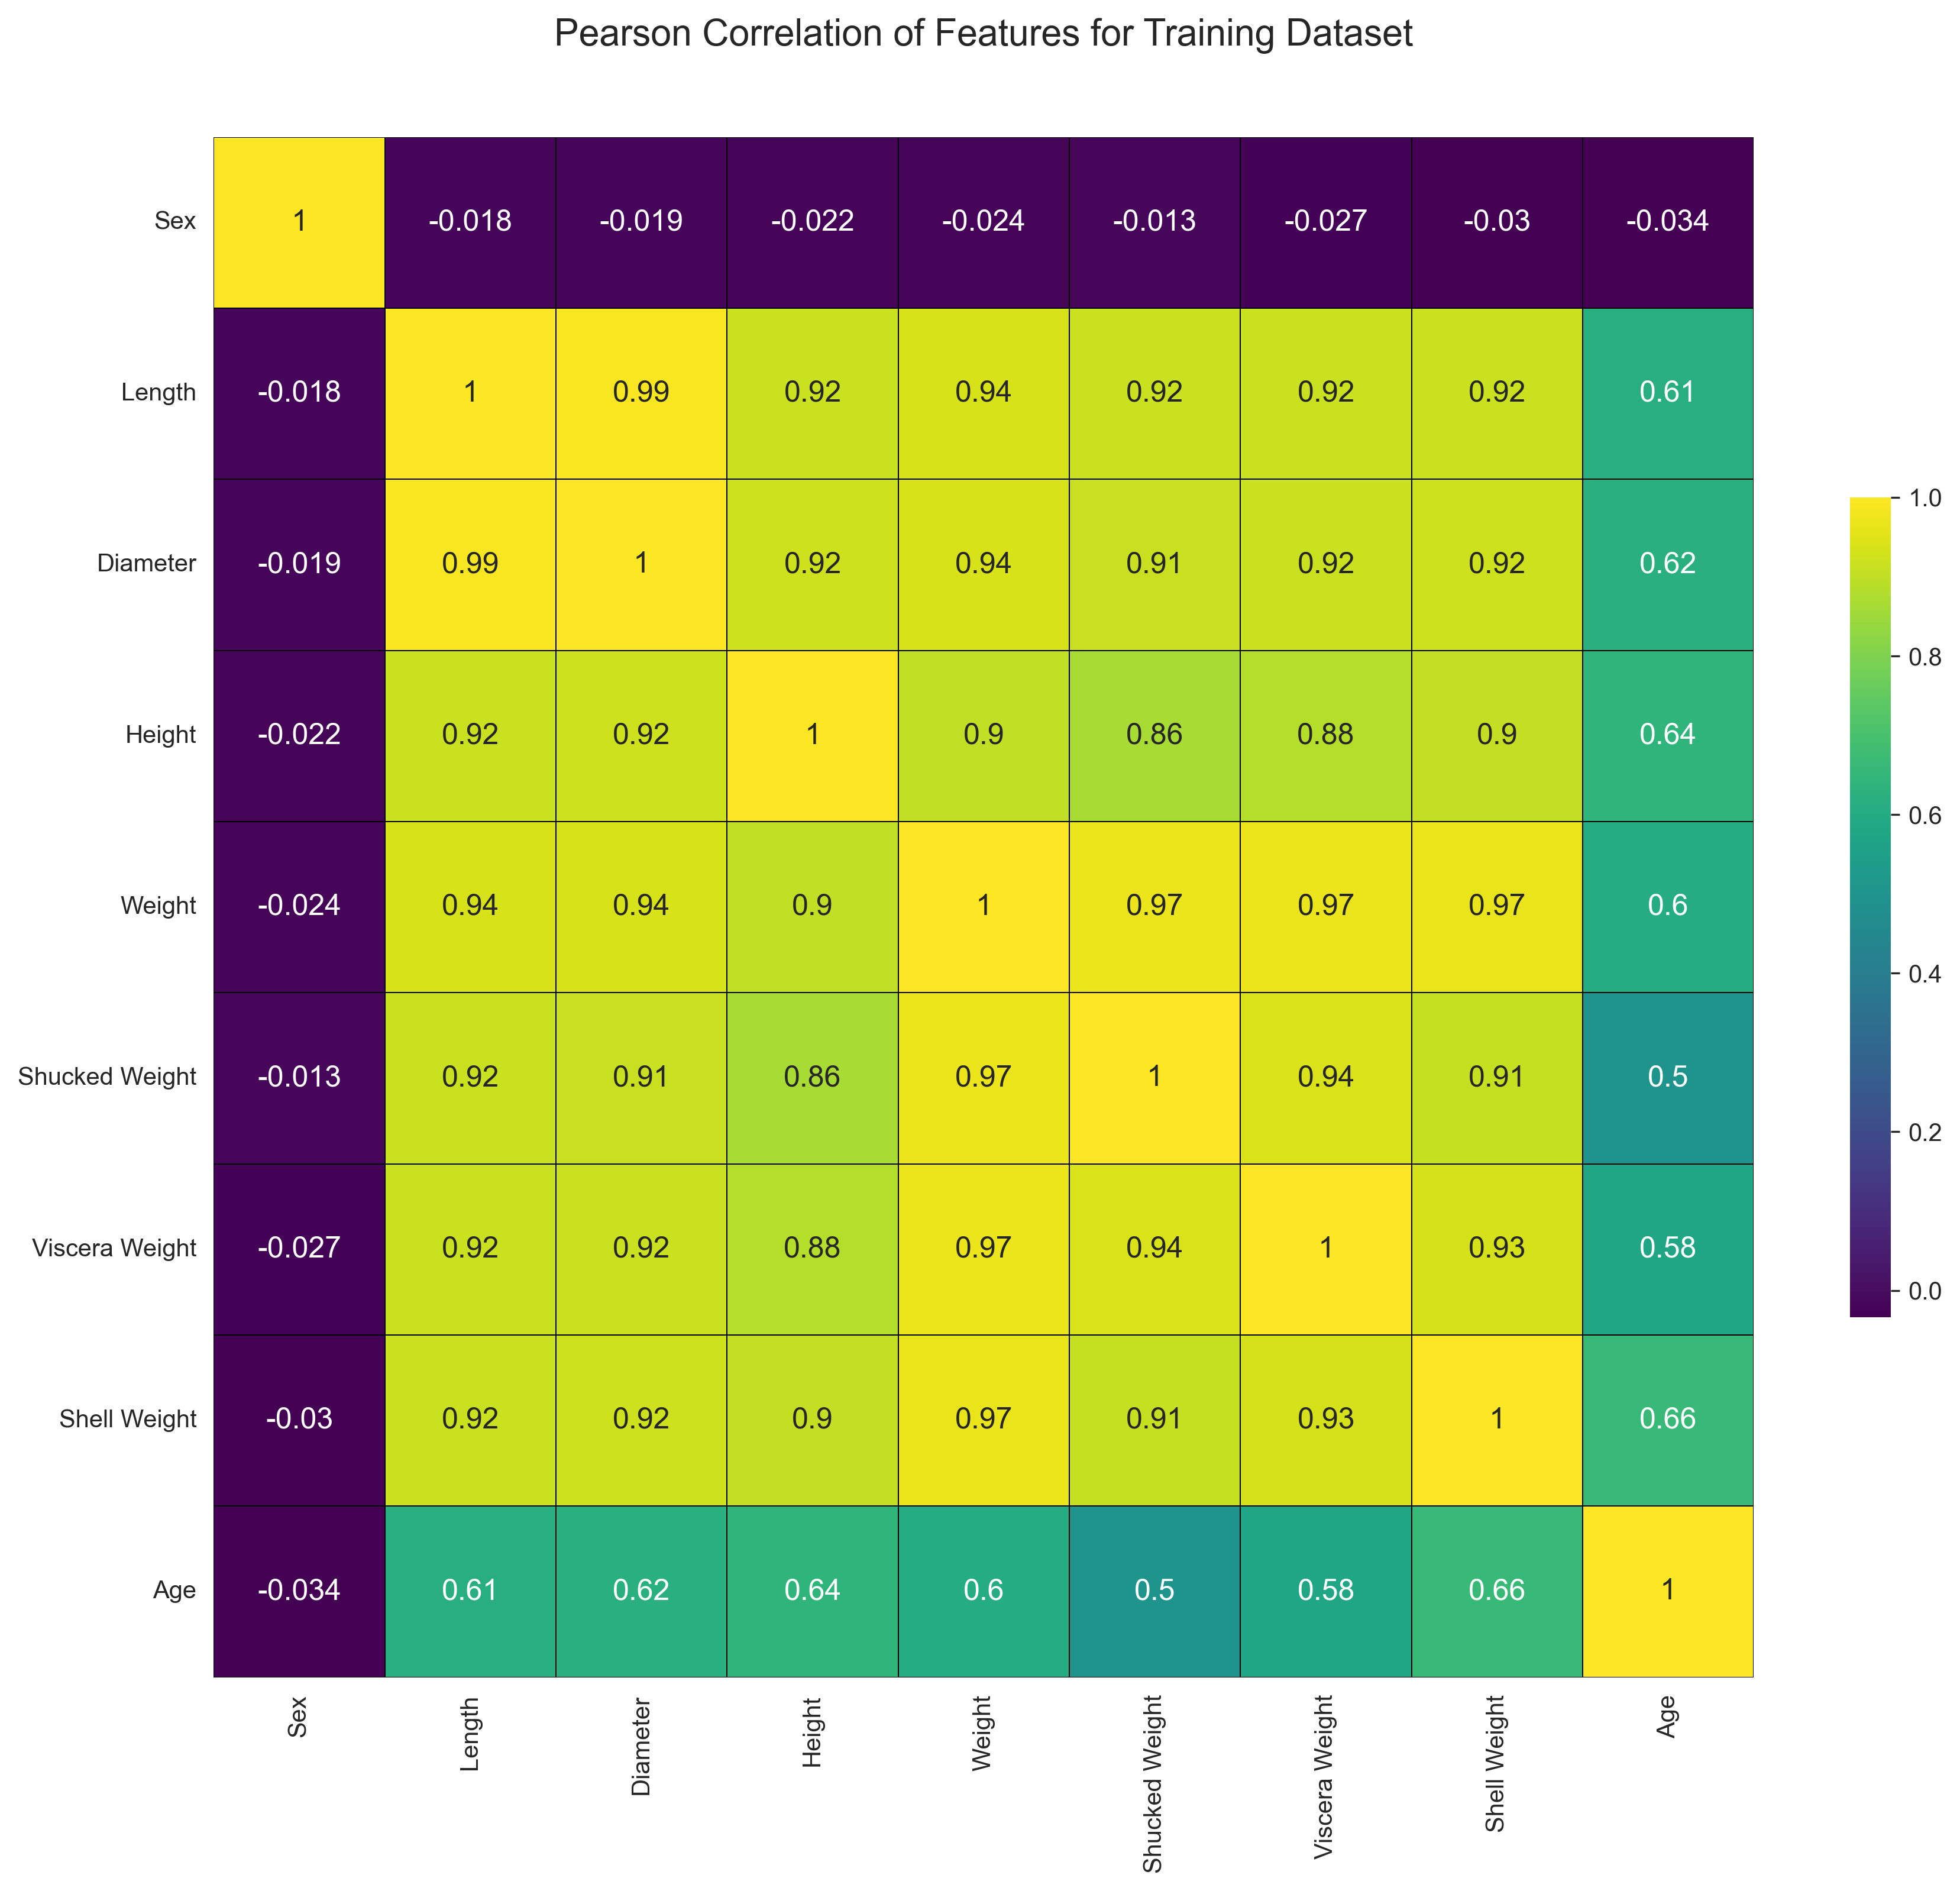

In [21]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12), dpi=300)
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "viridis",
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features for Training Dataset', y=1.05, size=15)

correlation_heatmap(train_data)

In [22]:
train_data.corr()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Sex,1.000000,-0.017546,-0.018933,-0.022480,-0.024429,-0.013444,-0.027389,-0.029583,-0.033541
Length,-0.017546,1.000000,0.989437,0.918352,0.936374,0.915516,0.917855,0.916957,0.612843
Diameter,-0.018933,0.989437,1.000000,0.921353,0.938249,0.914199,0.918351,0.922688,0.621256
Height,-0.022480,0.918352,0.921353,1.000000,0.901775,0.864083,0.883127,0.903398,0.638067
Weight,-0.024429,0.936374,0.938249,0.901775,1.000000,0.971267,0.971062,0.965525,0.601195
Shucked Weight,-0.013444,0.915516,0.914199,0.864083,0.971267,1.000000,0.942626,0.910398,0.503320
Viscera Weight,-0.027389,0.917855,0.918351,0.883127,0.971062,0.942626,1.000000,0.933919,0.576808
Shell Weight,-0.029583,0.916957,0.922688,0.903398,0.965525,0.910398,0.933919,1.000000,0.663473
Age,-0.033541,0.612843,0.621256,0.638067,0.601195,0.503320,0.576808,0.663473,1.000000


# <font color='#FF4500'>Summary for Correlation Values in the Train Dataset:<font><a class='anchor' id='top'></a>


<div class="alert alert-block alert-info"> 

📌 

- Sex: Weak correlation with other variables.

- Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight: Strong positive correlations with each other.

- Age: Moderately correlated with size-related attributes.


</div>



# <font color='#FF4500'>Dataset Feature Distributions Train Data<font><a class='anchor' id='top'></a>

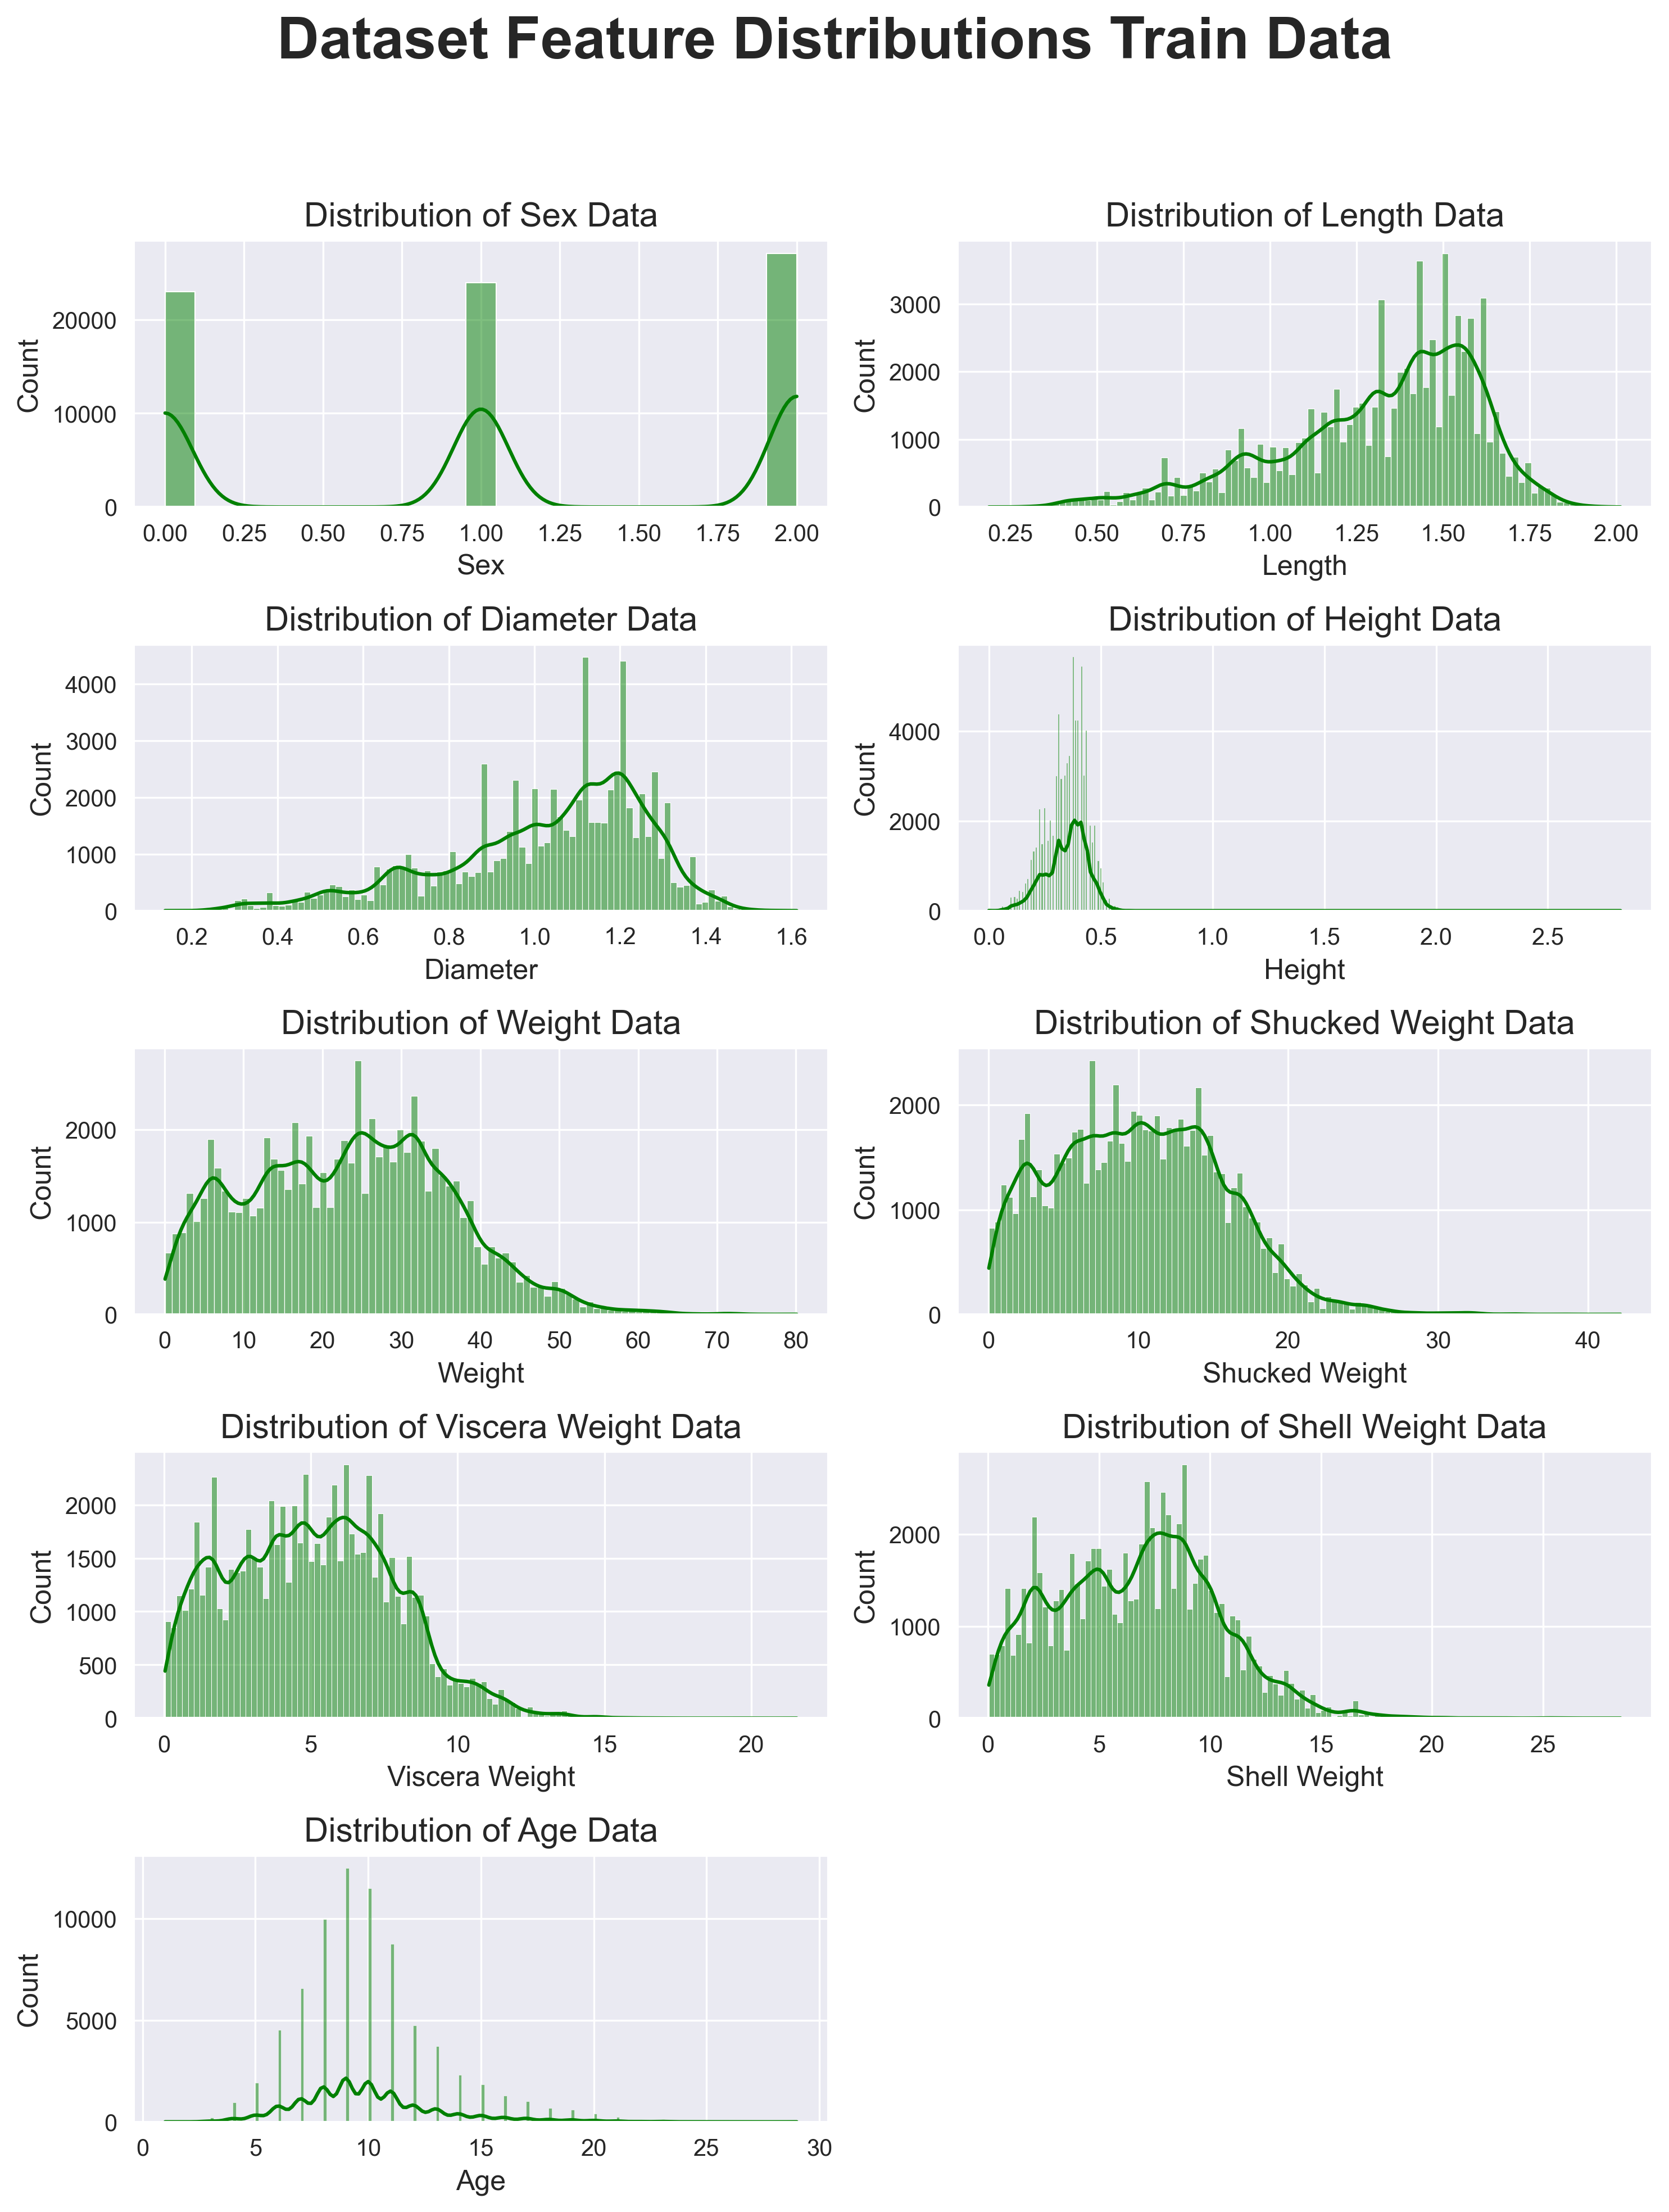

In [23]:
plt.figure(figsize=(10,30), dpi=300)
sns.set_style('darkgrid')
plt.suptitle(f'Dataset Feature Distributions Train Data\n\n\n', ha='center',  fontweight='bold', fontsize=25)
for i,col in enumerate(train_data.columns,1):
    plt.subplot(12,2,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(train_data[col],kde=True, color="green")
    plt.tight_layout()
    plt.plot()
plt.show()

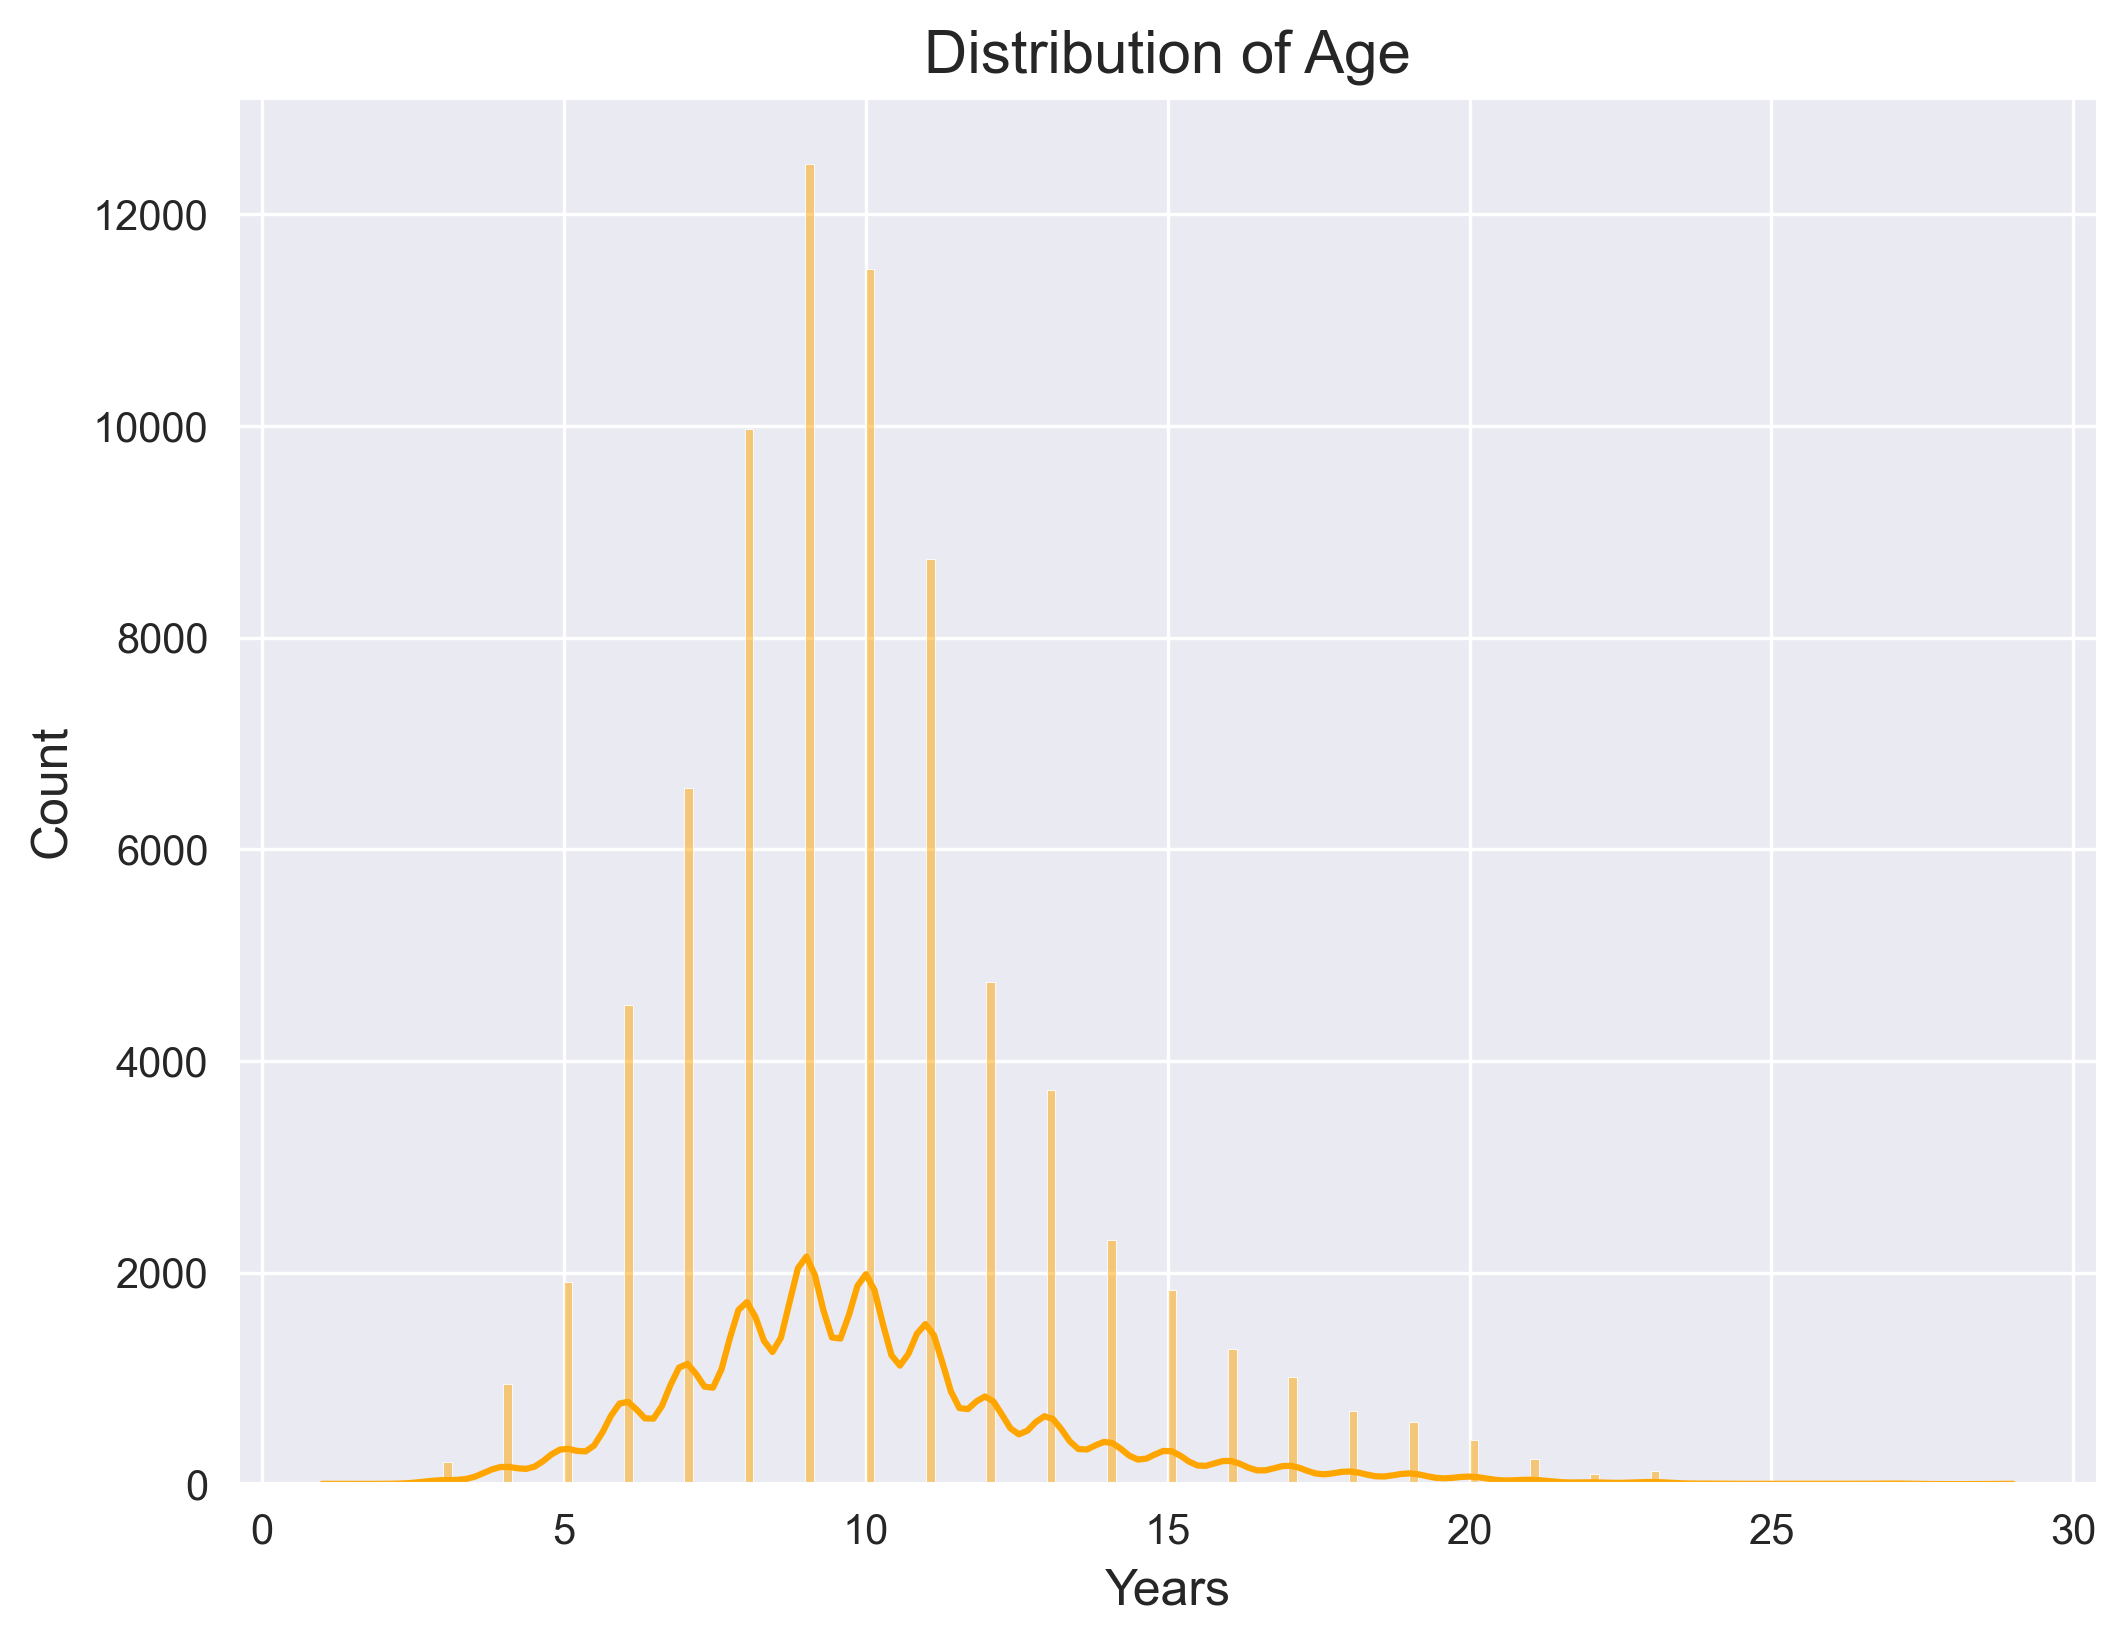

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the target feature
plt.figure(figsize=(8, 6), dpi=300)
sns.histplot(data=train_data, x='Age', kde=True, color='orange')
plt.title('Distribution of Age')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()


Skewness: 
- A skewness value of 0 indicates a symmetric distribution.
- A positive skewness value (> 0) indicates a right-skewed distribution, with a longer tail on the right side.
- A negative skewness value (< 0) indicates a left-skewed distribution, with a longer tail on the left side.

Kurtosis:
- A kurtosis value of 0 indicates a normal distribution (mesokurtic).
- A positive kurtosis value (> 0) indicates a distribution with heavier tails and more extreme values (leptokurtic).
- A negative kurtosis value (< 0) indicates a distribution with lighter tails and fewer extreme values (platykurtic).

In [37]:
from scipy import stats

target_skewness = stats.skew(train_data['Age'])
target_kurtosis = stats.kurtosis(train_data['Age'])

print("Skewness:", target_skewness)
print("Kurtosis:", target_kurtosis)


Skewness: 1.0928970360782981
Kurtosis: 2.2964045704381375



<div class="alert alert-block alert-info"> 

📌 Observing the Skewness value of each Feature

</div>

Skewness refers to the measure of asymmetry in a probability distribution. It indicates the extent to which the data deviates from a symmetrical distribution. There are three main types of skewness:

1. Positive Skewness (Right Skewness):
   - Also known as right skewness.
   - It occurs when the tail of the distribution is skewed towards the right.
   - The majority of the data is concentrated on the left side of the distribution, with a long tail on the right side.
   - The mean is typically greater than the median and mode.
   - The right tail is stretched out, resulting in a positive skewness value.

2. Negative Skewness (Left Skewness):
   - Also known as left skewness.
   - It occurs when the tail of the distribution is skewed towards the left.
   - The majority of the data is concentrated on the right side of the distribution, with a long tail on the left side.
   - The mean is typically less than the median and mode.
   - The left tail is stretched out, resulting in a negative skewness value.

3. Zero Skewness:
   - Also known as symmetrical distribution.
   - It occurs when the distribution is perfectly symmetrical.
   - The data is evenly distributed around the mean, with no significant skewness towards either tail.
   - The mean, median, and mode are all equal.
   - The skewness value is close to zero.

Skewness is a useful measure to understand the shape of a distribution and identify departures from symmetry. Positive and negative skewness indicate the direction and extent of asymmetry, while zero skewness represents a symmetrical distribution.

<center>
<img src="
https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width=500>
</center>

In [24]:
import numpy as np
from scipy.stats import skew

def check_skewness(data):
    skewness_results = {}
    
    for col in data.columns:
        col_data = data[col]
        skewness = skew(col_data)
        skewness_results[col] = skewness
    
    return skewness_results

def handle_skewness(skewness_results):
    for col, skewness in skewness_results.items():
        print(f"Feature: {col}")
        print(f"Skewness: {skewness:.4f}")
        if abs(skewness) > 0.5:
            if skewness > 0:
                print("The feature is positively skewed.")
                print("Recommendation: Apply log transformation.")
            else:
                print("The feature is negatively skewed.")
                print("Recommendation: Apply power transformation (e.g., Box-Cox).")
        else:
            print("The feature is not skewed.")
        print('-' * 20)

# Example usage
skewness_results = check_skewness(train_data)
handle_skewness(skewness_results)


Feature: Sex
Skewness: -0.1019
The feature is not skewed.
--------------------
Feature: Length
Skewness: -0.8444
The feature is negatively skewed.
Recommendation: Apply power transformation (e.g., Box-Cox).
--------------------
Feature: Diameter
Skewness: -0.8128
The feature is negatively skewed.
Recommendation: Apply power transformation (e.g., Box-Cox).
--------------------
Feature: Height
Skewness: 0.0866
The feature is not skewed.
--------------------
Feature: Weight
Skewness: 0.2315
The feature is not skewed.
--------------------
Feature: Shucked Weight
Skewness: 0.3495
The feature is not skewed.
--------------------
Feature: Viscera Weight
Skewness: 0.2864
The feature is not skewed.
--------------------
Feature: Shell Weight
Skewness: 0.2775
The feature is not skewed.
--------------------
Feature: Age
Skewness: 1.0929
The feature is positively skewed.
Recommendation: Apply log transformation.
--------------------


# <font color='#FF4500'>Outlier Detection<font><a class='anchor' id='top'></a>

This code snippet demonstrates how to visualize outliers in numeric features using boxplots. Here's a breakdown of the code:

1. The first two lines import the necessary libraries: `seaborn` as `sns` for data visualization and `matplotlib.pyplot` as `plt` for creating plots.

2. The `data` variable is assigned the `train_data` DataFrame with the 'Sex' column dropped. This is done to exclude the categorical feature from the analysis since boxplots are suited for numeric data.

3. The `display_outliers` function is defined, which takes the `data` DataFrame as input.

4. The function starts by selecting the numeric columns from the DataFrame using `data.select_dtypes(include=['float64', 'int64']).columns.tolist()`. This returns a list of column names that have either float or integer data types.

5. The length of the `numeric_cols` list is stored in `num_cols_len`.

6. The number of rows for the subplots is determined using `(num_cols_len + 1) // 2`. This ensures that the subplots are arranged in a grid-like structure with two columns and a number of rows based on the number of numeric columns.

7. `plt.subplots` is called to create the figure and axes for the subplots. The `figsize` parameter is set to `(10, 5 * num_rows)` to control the size of the figure, and `dpi=300` sets the DPI (dots per inch) to 300 for better resolution.

8. The title for the figure is set using `fig.suptitle`, with the text "Outliers in Numeric Features" and some formatting options.

9. The `axes` array is flattened using `axes.flatten()` to convert it to a 1-dimensional array. This ensures consistent indexing when iterating over the numeric columns.

10. A loop is used to iterate over the numeric columns. For each column, a boxplot is created using `sns.boxplot` with the data from the corresponding column (`data[col]`). The boxplot is assigned to an axis (`ax`) from the flattened `axes` array.

11. Additional formatting is applied to each subplot using `ax.set_title` to set the title with the column name, and `ax.set_xlabel('')` to remove the x-axis label.

12. Finally, `plt.tight_layout()` is called to optimize the spacing between subplots, and `plt.show()` displays the figure with the boxplots.

13. The `display_outliers` function is then called, passing the `data` DataFrame as the argument to visualize the outliers in the numeric features of the dataset.

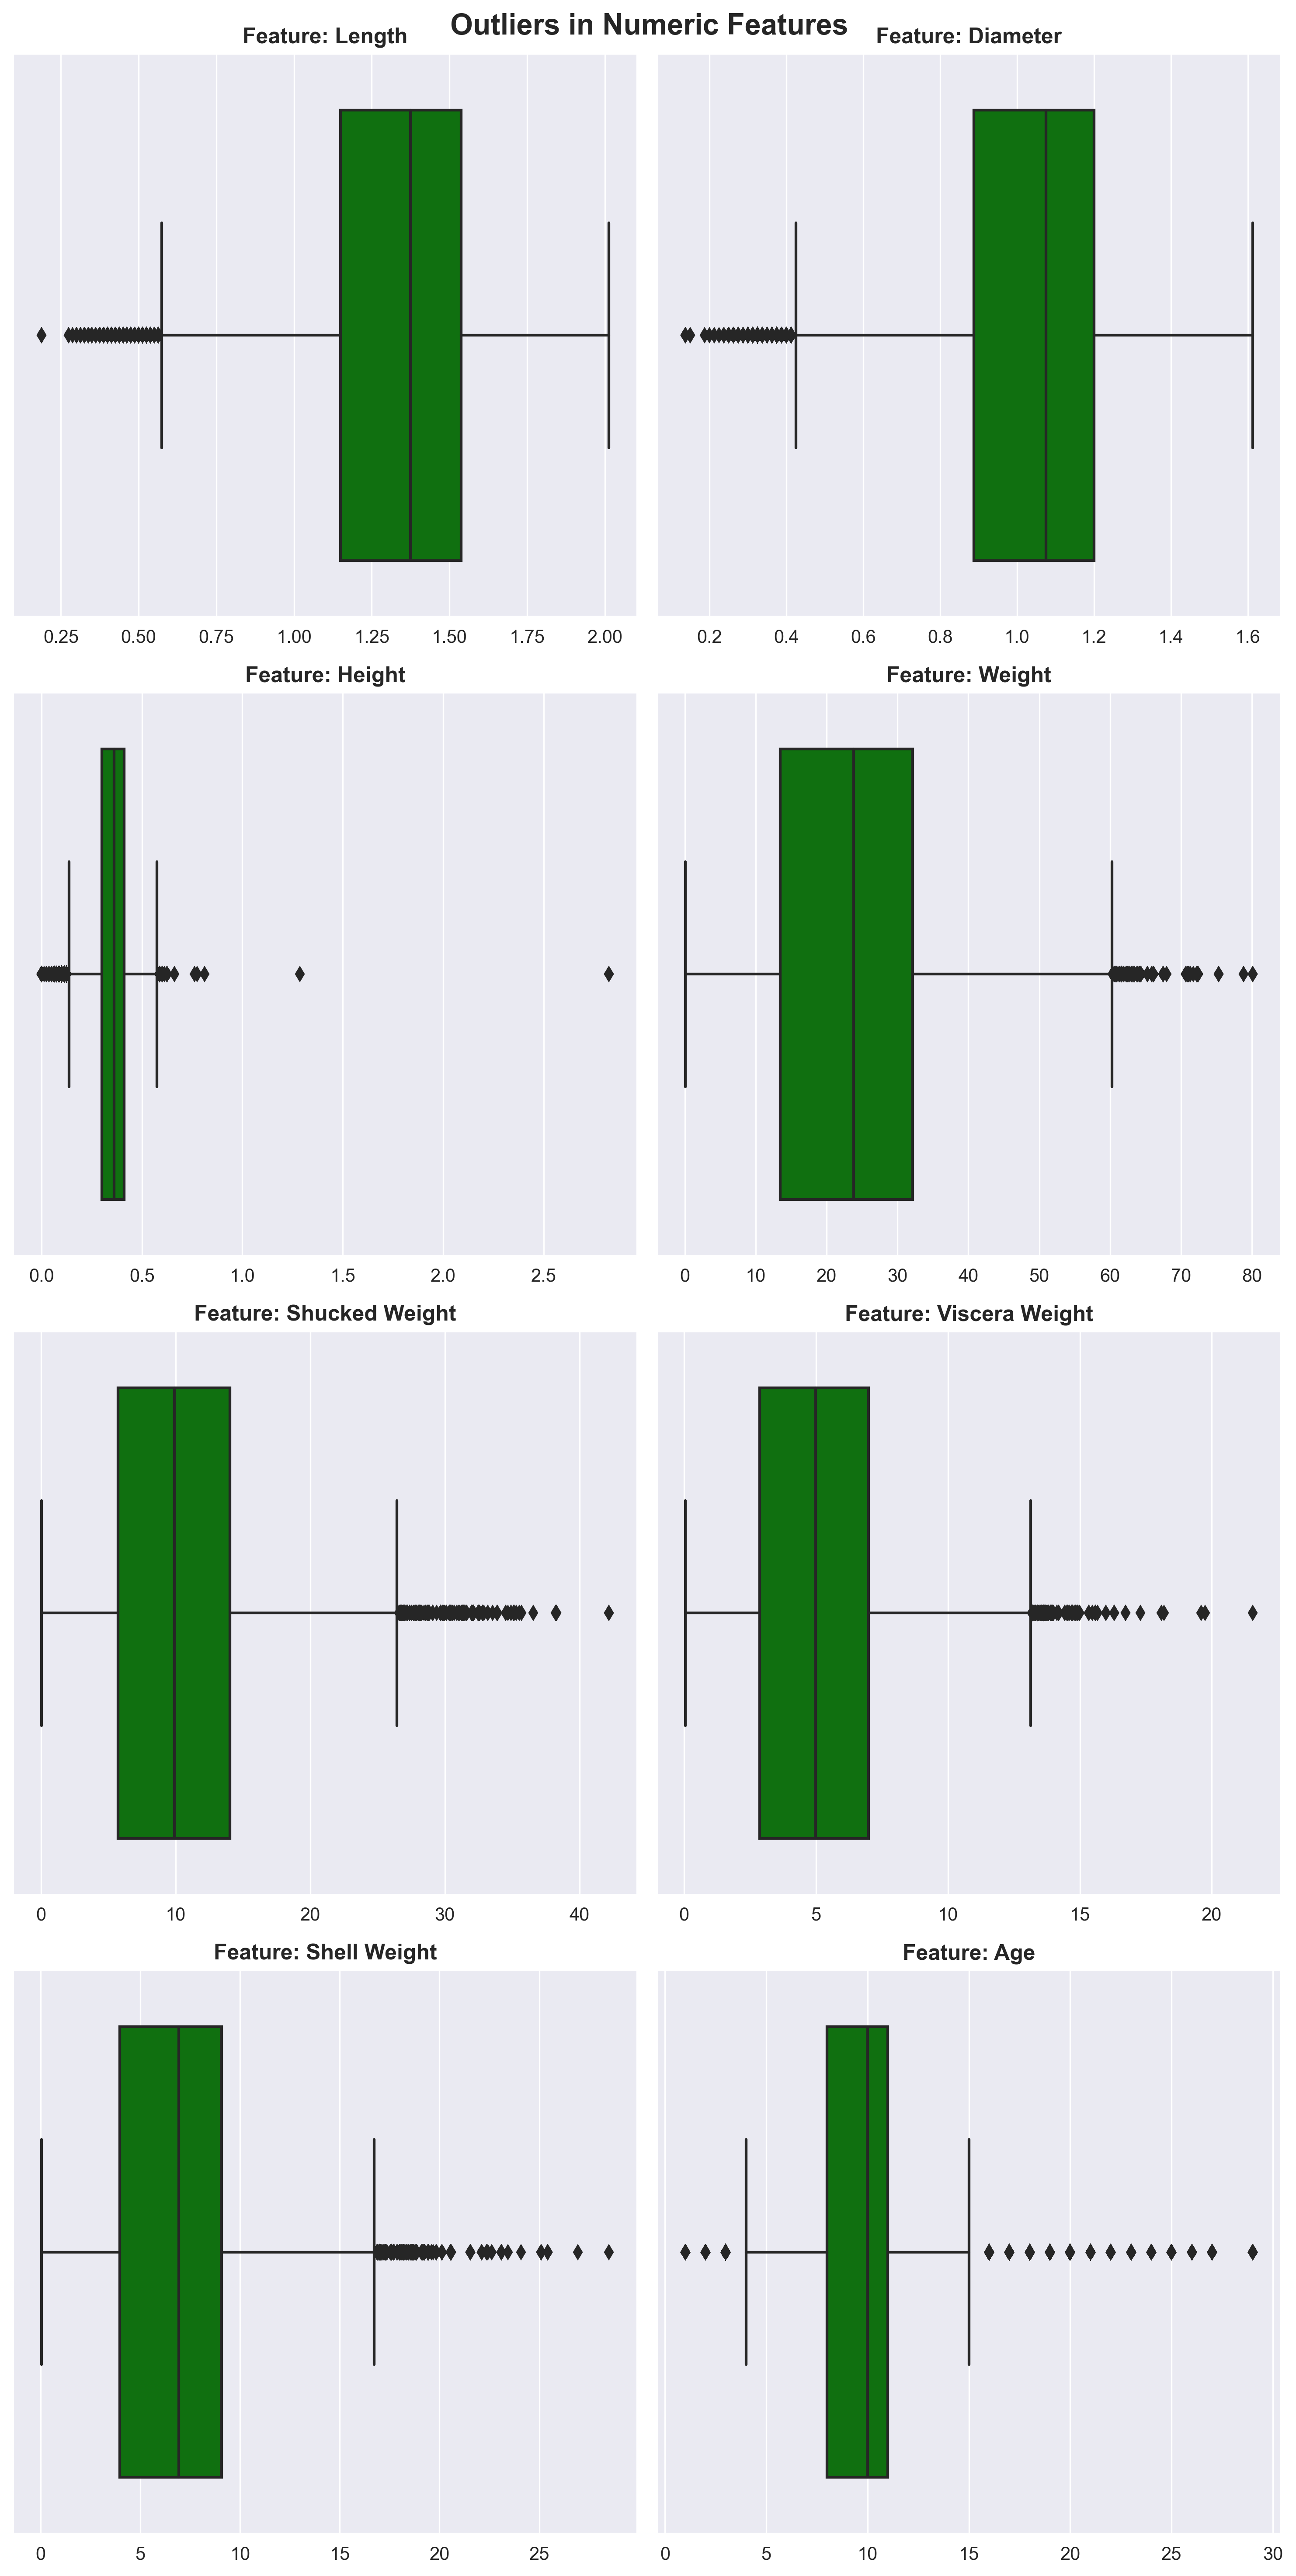

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
data = train_data.drop('Sex', axis=1)
def display_outliers(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    num_cols_len = len(numeric_cols)
    num_rows = (num_cols_len + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows),dpi=300)
    fig.suptitle('Outliers in Numeric Features', fontsize=16, fontweight='bold')

    axes = axes.flatten()  # Flatten the axes array for consistent indexing

    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        sns.boxplot(x=data[col], ax=ax, color='green')
        ax.set_title(f'Feature: {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel('')

    plt.tight_layout()
    plt.show()


# Call the display_outliers function
display_outliers(data)
